In [16]:
import pandas as pd

df = pd.read_csv('../../data/processed/normalized_data.csv')

X = df.iloc[:, 3:].values 
y = df['syndrome_id'].values  


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_knn(X, y, metric='euclidean'):
    """Avaliar o KNN com validação cruzada de 10 folds, retornando estatísticas completas."""
    best_k = None
    best_score = 0
    scores = []

    for k in range(1, 16): 
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # validação cruzada
        cv_scores = cross_val_score(knn, X, y, cv=10)
        
        # Salvando scores
        score = np.mean(cv_scores)
        scores.append(score)

        print(f"\n----- k={k} com {metric} -----")
        print(f"Cross-Validation Scores: {cv_scores}")
        print(f"Mean Accuracy: {cv_scores.mean():.4f}")
        print(f"Standard Deviation: {cv_scores.std():.4f}")

        if score > best_score:
            best_score = score
            best_k = k

    print(f"\nMelhor k para {metric}: {best_k} com acurácia média: {best_score:.4f}")
    return best_k, scores

# Testar com distância Euclidiana e Cosseno
best_k_euclidean, scores_euclidean = evaluate_knn(X, y, metric='euclidean')
best_k_cosine, scores_cosine = evaluate_knn(X, y, metric='cosine')



----- k=1 com euclidean -----
Cross-Validation Scores: [0.61607143 0.58928571 0.61607143 0.64285714 0.65178571 0.64285714
 0.7027027  0.58558559 0.56756757 0.47747748]
Mean Accuracy: 0.6092
Standard Deviation: 0.0574

----- k=2 com euclidean -----
Cross-Validation Scores: [0.57142857 0.61607143 0.57142857 0.61607143 0.58928571 0.60714286
 0.64864865 0.57657658 0.54954955 0.46846847]
Mean Accuracy: 0.5815
Standard Deviation: 0.0465

----- k=3 com euclidean -----
Cross-Validation Scores: [0.63392857 0.66964286 0.5625     0.71428571 0.5625     0.66964286
 0.66666667 0.54954955 0.56756757 0.53153153]
Mean Accuracy: 0.6128
Standard Deviation: 0.0615

----- k=4 com euclidean -----
Cross-Validation Scores: [0.64285714 0.69642857 0.59821429 0.76785714 0.67857143 0.74107143
 0.72072072 0.61261261 0.55855856 0.55855856]
Mean Accuracy: 0.6575
Standard Deviation: 0.0710

----- k=5 com euclidean -----
Cross-Validation Scores: [0.66964286 0.73214286 0.61607143 0.72321429 0.70535714 0.71428571
 0.72

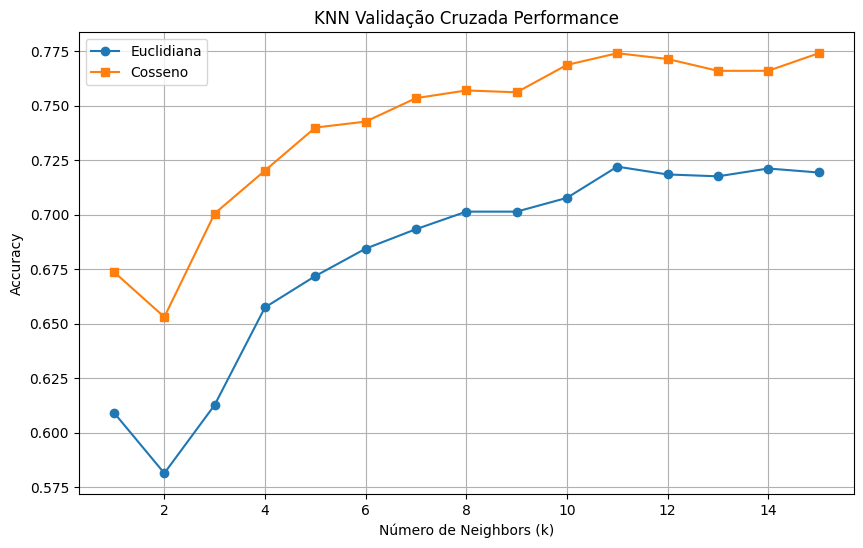

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), scores_euclidean, label='Euclidiana', marker='o')
plt.plot(range(1, 16), scores_cosine, label='Cosseno', marker='s')
plt.title('KNN Validação Cruzada Performance')
plt.xlabel('Número de Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


### Treinamento

In [ ]:
from sklearn.model_selection import train_test_split

# treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo com o melhor k
best_knn = KNeighborsClassifier(n_neighbors=best_k_euclidean, metric='euclidean')
best_knn.fit(X_train, y_train)
print(f"Modelo treinado com k={best_k_euclidean} usando distância Euclidiana.")


Modelo treinado com k=11 usando distância Euclidiana.


### Métricas

In [20]:
from sklearn.metrics import f1_score, roc_auc_score
import seaborn as sns

y_pred = best_knn.predict(X_test)

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

if hasattr(best_knn, "predict_proba"):
    y_proba = best_knn.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    print(f"AUC Score: {auc:.4f}")
else:
    print("AUC not available for this KNN configuration.")


F1-Score: 0.7195
AUC Score: 0.9452


In [21]:
# Repetir o processo para a métrica Cosseno
best_knn_cosine = KNeighborsClassifier(n_neighbors=best_k_cosine, metric='cosine')
best_knn_cosine.fit(X_train, y_train)
y_pred_cosine = best_knn_cosine.predict(X_test)

# Calcular F1-Score para Cosseno
f1_cosine = f1_score(y_test, y_pred_cosine, average='weighted')
print(f"F1-Score (Cosseno): {f1_cosine:.4f}")

# Comparação
print("\nComparação:")
print(f"F1-Score Euclidiana: {f1:.4f}")
print(f"F1-Score Cosseno: {f1_cosine:.4f}")


F1-Score (Cosseno): 0.7612

Comparação:
F1-Score Euclidiana: 0.7195
F1-Score Cosseno: 0.7612


- Euclidiana: 0.7195
- Cosseno: 0.7612 (melhor)
- Conclusão: O F1-Score mais alto com a distância cosseno indica uma melhor performance de classificação
- -> geralmente a dist6ancia de cosseno é indicado quando os dados têm alta dimensionalidade e previamente normalizados (como feito na normalização).

              precision    recall  f1-score   support

   100180860       0.73      0.67      0.70        12
   100192430       0.75      0.79      0.77        19
   100610443       0.76      0.89      0.82        18
   100610883       0.54      0.64      0.58        11
   300000007       0.85      0.88      0.86        25
   300000018       0.50      0.57      0.53        14
   300000034       0.84      0.95      0.89        44
   300000080       0.80      0.74      0.77        38
   300000082       0.79      0.79      0.79        24
   700018215       0.88      0.37      0.52        19

    accuracy                           0.77       224
   macro avg       0.74      0.73      0.72       224
weighted avg       0.78      0.77      0.76       224



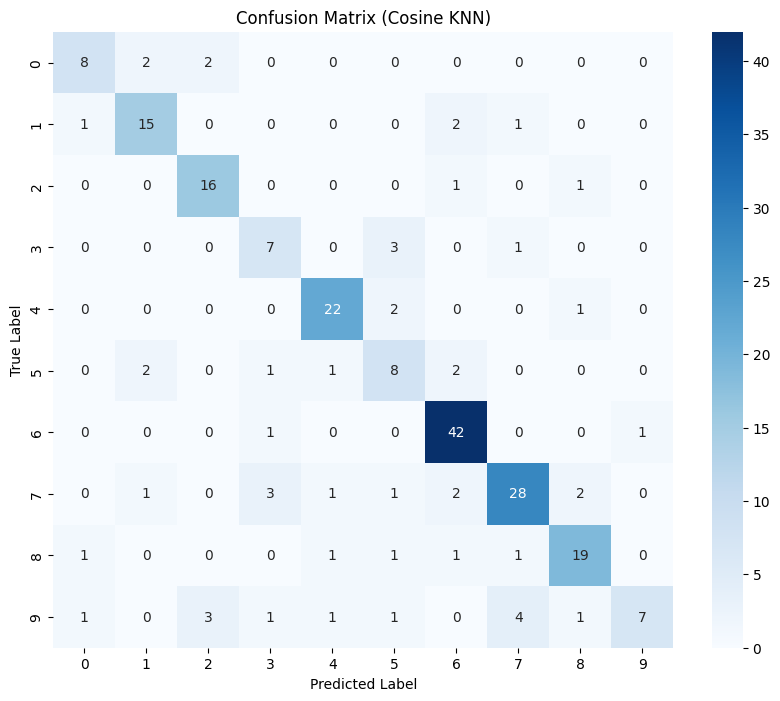

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# previsões
y_pred_cosine = best_knn_cosine.predict(X_test)

print(classification_report(y_test, y_pred_cosine))

# Matriz de confusão para visualizar os erros
conf_matrix = confusion_matrix(y_test, y_pred_cosine)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Cosine KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


- (Precisão): Média de 0.78 — o modelo está corretamente identificando a maioria das classes.
- (Recall): Média de 0.77 — o modelo está conseguindo capturar bem as amostras positivas.
- F1-Score: Média ponderada de 0.76, indicando um bom equilíbrio entre precisão e recall.
Bom Desempenho Geral. As métricas estão acima de 0.75, o que é positivo.

In [24]:
import joblib

best_knn_cosine_final = KNeighborsClassifier(n_neighbors=best_k_cosine, metric='cosine')
best_knn_cosine_final.fit(X, y)

# Salvando o modelo 
joblib.dump(best_knn_cosine_final, '../models/best_knn_cosine.pkl')
print("Modelo salvo com sucesso em 'models/best_knn_cosine.pkl'")


Modelo salvo com sucesso em 'models/best_knn_cosine.pkl'


In [27]:
results_df = pd.DataFrame({
    "k": range(1, 16),
    "Accuracy (Euclidean)": scores_euclidean,
    "Accuracy (Cosine)": scores_cosine
})

results_df.to_csv('../../data/results/knn_cross_validation_results.csv', index=False)
print("Resultados salvos em 'data/results/knn_cross_validation_results.csv'")


Resultados salvos em 'data/results/knn_cross_validation_results.csv'
